In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sb  
sb.set_style('darkgrid')

In [4]:
daily_data = pd.read_csv('daily_full.csv', skiprows=7, header=0)
print daily_data.head(5)

          DATE  IUDBEDR  IUDSOIA  XUDLDS1  XUDLERS  XUDLUSS
0  04 Jan 2000      5.5   4.5910   1.6354   1.5874   1.6352
1  05 Jan 2000      5.5   4.4584   1.6392   1.5862   1.6390
2  06 Jan 2000      5.5   4.9208   1.6480   1.5921   1.6478
3  07 Jan 2000      5.5   4.4172   1.6374   1.5909   1.6372
4  10 Jan 2000      5.5   4.2968   1.6379   1.5956   1.6377


In [5]:
daily_data['datetime'] = pd.to_datetime(daily_data['DATE'])
daily_data['dayofweek'] = daily_data['datetime'].apply(lambda row: row.dayofweek)
weekly_data = daily_data[daily_data['dayofweek'] == 4]



In [6]:
print weekly_data.head(5)

           DATE  IUDBEDR  IUDSOIA  XUDLDS1  XUDLERS  XUDLUSS   datetime  \
3   07 Jan 2000     5.50   4.4172   1.6374   1.5909   1.6372 2000-01-07   
8   14 Jan 2000     5.75   5.0126   1.6351   1.6152   1.6349 2000-01-14   
13  21 Jan 2000     5.75   5.8912   1.6506   1.6391   1.6506 2000-01-21   
18  28 Jan 2000     5.75   6.0424   1.6198   1.6529   1.6198 2000-01-28   
23  04 Feb 2000     5.75   5.6334   1.5885   1.6214   1.5886 2000-02-04   

    dayofweek  
3           4  
8           4  
13          4  
18          4  
23          4  


In [56]:
UK_US = pd.DataFrame()
UK_US['UK_US']=weekly_data['XUDLUSS']
UK_US['LIBOR']=weekly_data['IUDSOIA']
UK_US['forward_UK_US_1mo']=weekly_data['XUDLDS1']
UK_US['datetime']=weekly_data['datetime']
UK_US = UK_US.reset_index(drop=True)

UK_EU = pd.DataFrame()
UK_EU['UK_EU']=weekly_data['XUDLERS']
UK_EU['LIBOR']=weekly_data['IUDSOIA']
UK_EU['forward_UK_US_1mo']=weekly_data['XUDLDS1']
UK_EU['datetime']=weekly_data['datetime']
UK_EU = UK_EU.reset_index(drop=True)



In [8]:
full = pd.DataFrame()
full['UK_US']=weekly_data['XUDLUSS']
full['LIBOR']=weekly_data['IUDSOIA']
full['forward_UK_US_1mo']=weekly_data['XUDLDS1']
full['datetime']=weekly_data['datetime']
full['UK_EU']=weekly_data['XUDLERS']
full = full.reset_index(drop=True)


/Users/cforoughi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/Users/cforoughi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


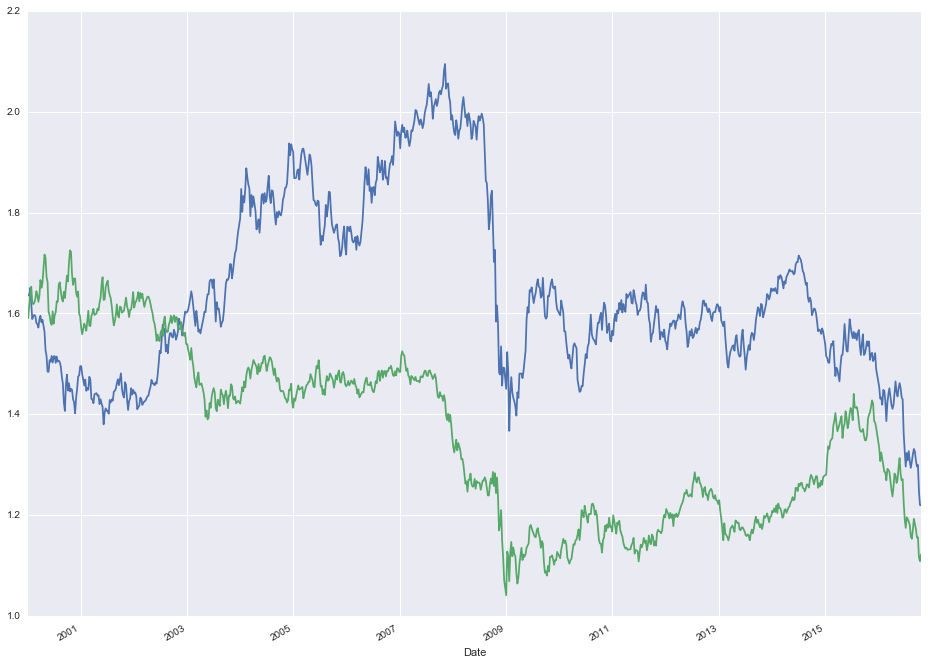

In [12]:
full['Date'] = full['datetime'].convert_objects(convert_dates='coerce')  
full = full.sort_index(by='Date')  
full = full.set_index('Date')  
full['UK_US'].plot(figsize=(16, 12))  
full['UK_EU'].plot(figsize=(16, 12)) 





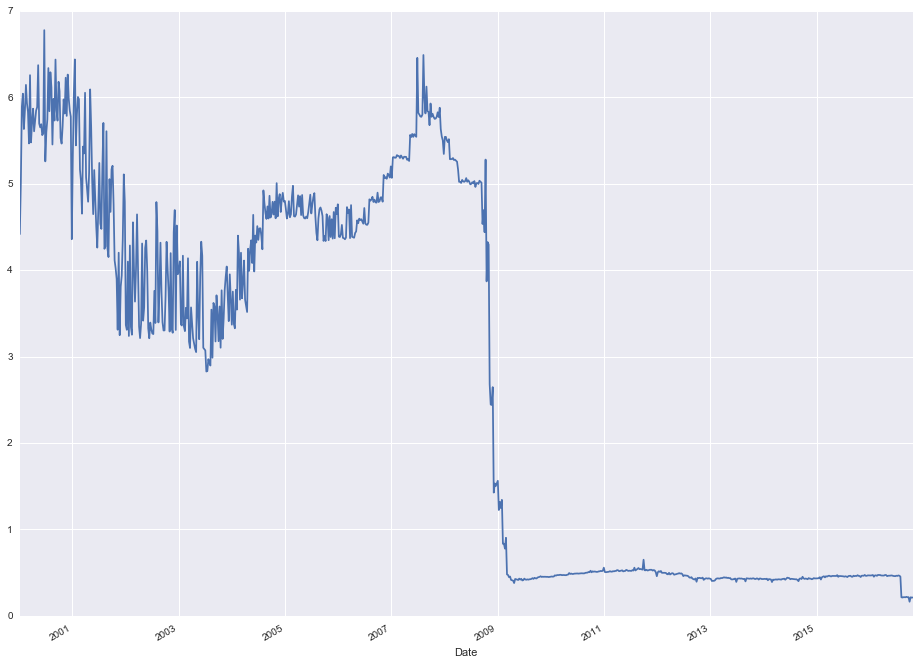

In [14]:
full['LIBOR'].plot(figsize=(16, 12)) 

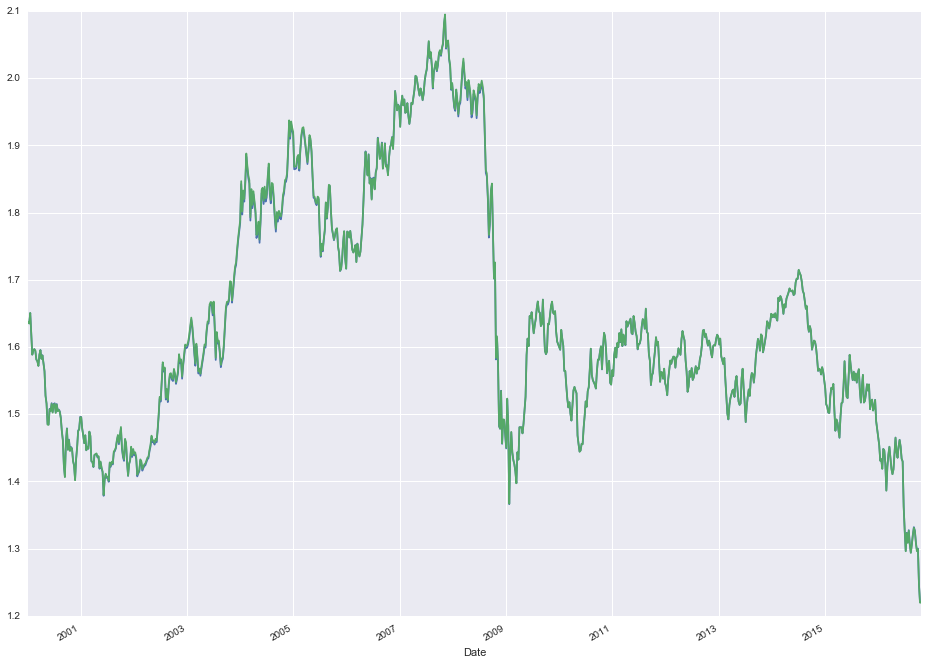

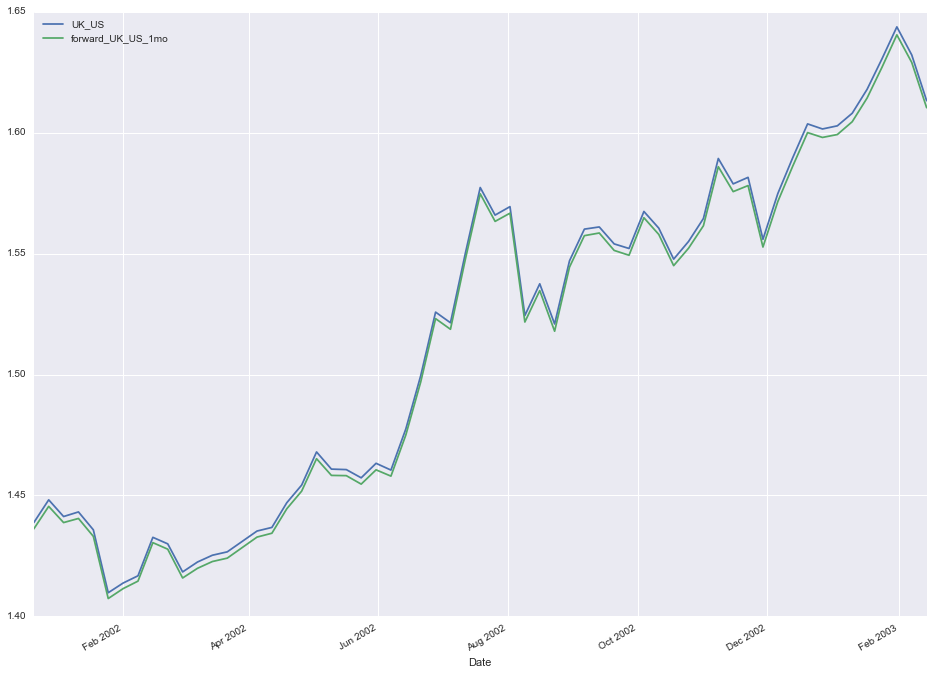

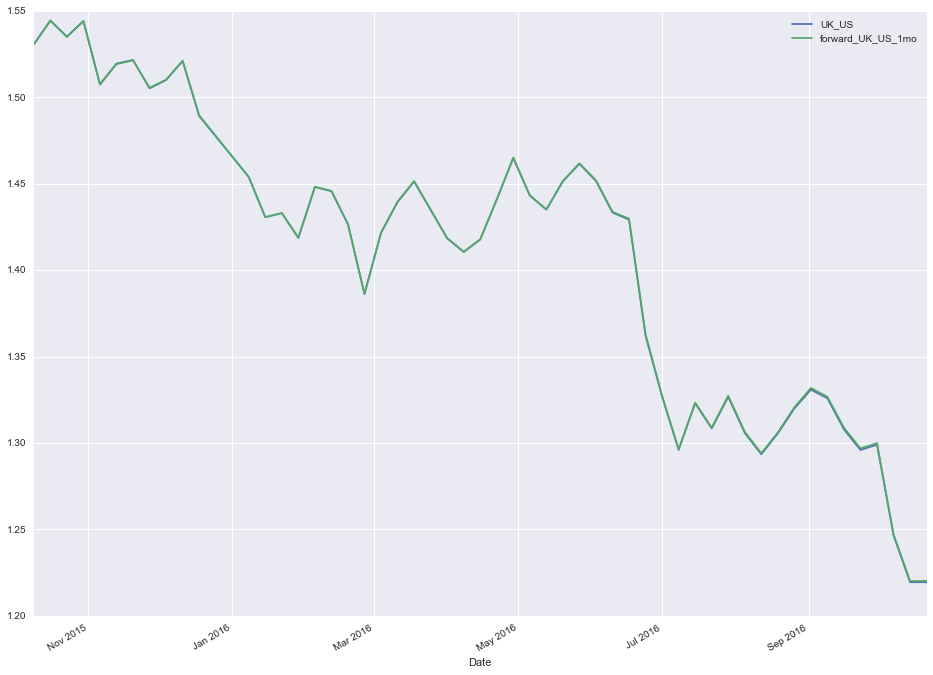

In [18]:
full['forward_UK_US_1mo'].plot(figsize=(16, 12)) 
full['UK_US'].plot(figsize=(16, 12)) 
full[['UK_US', 'forward_UK_US_1mo']].iloc[100:160, :].plot(figsize=(16, 12))  
full[['UK_US', 'forward_UK_US_1mo']].iloc[800:860, :].plot(figsize=(16, 12))  


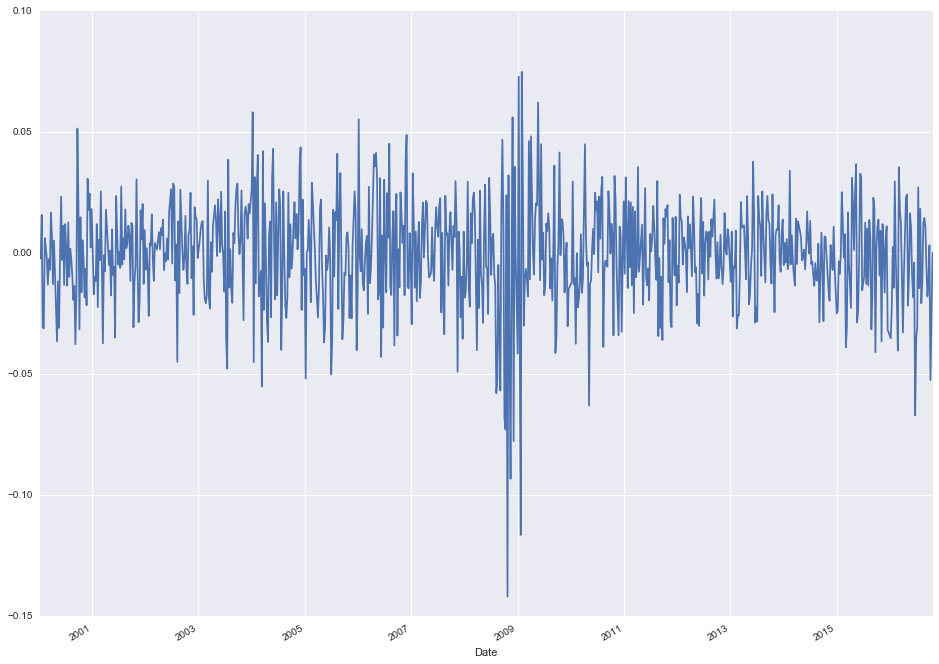

In [19]:
full['first_diff_uk_us'] = full['UK_US'] - full['UK_US'].shift()  
full['first_diff_uk_us'].plot(figsize=(16, 12))  

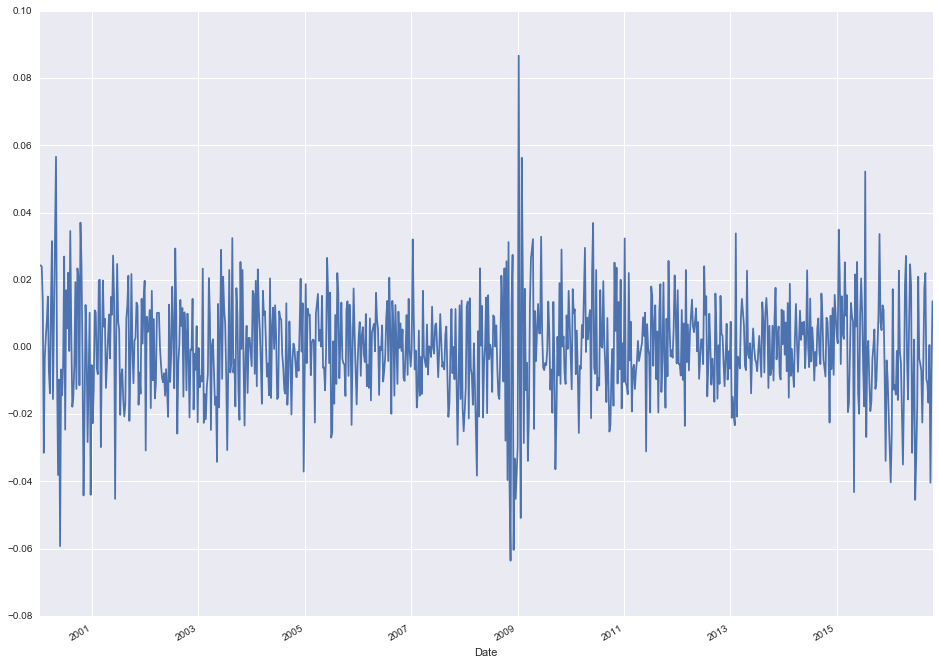

In [20]:
full['first_diff_uk_eu'] = full['UK_EU'] - full['UK_EU'].shift()  
full['first_diff_uk_eu'].plot(figsize=(16, 12))   

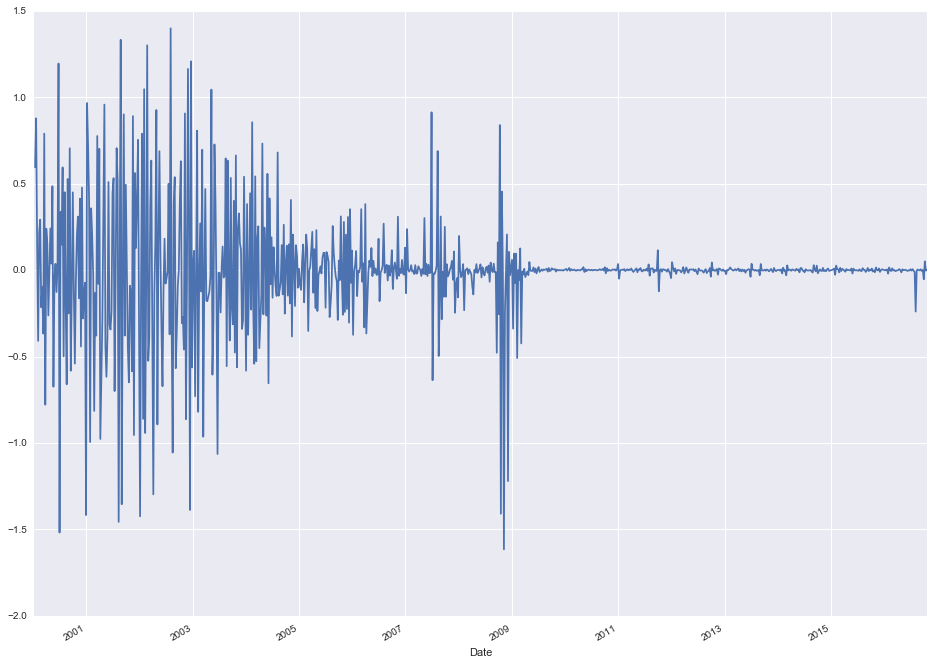

In [21]:
full['first_diff_libor'] = full['LIBOR'] - full['LIBOR'].shift()  
full['first_diff_libor'].plot(figsize=(16, 12))   

In [24]:
full['var_uk_us'] = pd.rolling_var(full['UK_US'], 4, min_periods=None, freq=None, center=True)  
full['var_uk_eu'] = pd.rolling_var(full['UK_EU'], 4, min_periods=None, freq=None, center=True)  
full['var_libor'] = pd.rolling_var(full['LIBOR'], 4, min_periods=None, freq=None, center=True) 

/Users/cforoughi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=True).var()
  if __name__ == '__main__':
/Users/cforoughi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=True).var()
  from ipykernel import kernelapp as app
/Users/cforoughi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=True).var()
  app.launch_new_instance()


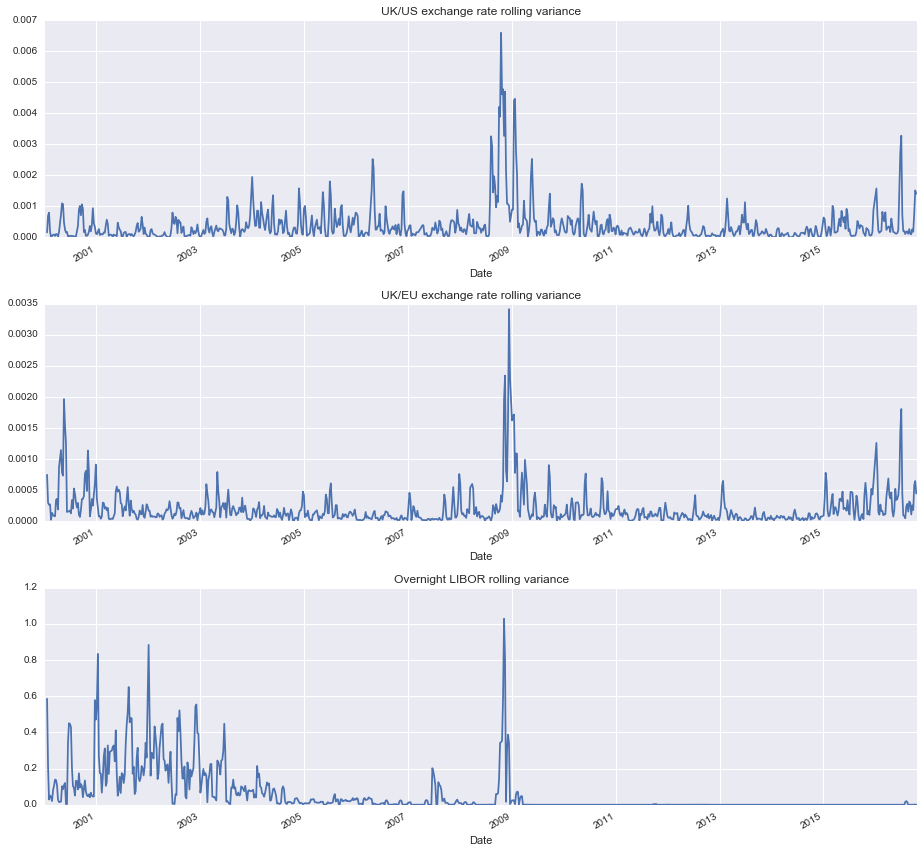

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(13, 12))  
full['var_uk_us'].plot(ax=ax[0], title='UK/US exchange rate rolling variance')  
full['var_uk_eu'].plot(ax=ax[1], title='UK/EU exchange rate rolling variance')  
full['var_libor'].plot(ax=ax[2], title='Overnight LIBOR rolling variance')  
fig.tight_layout()  

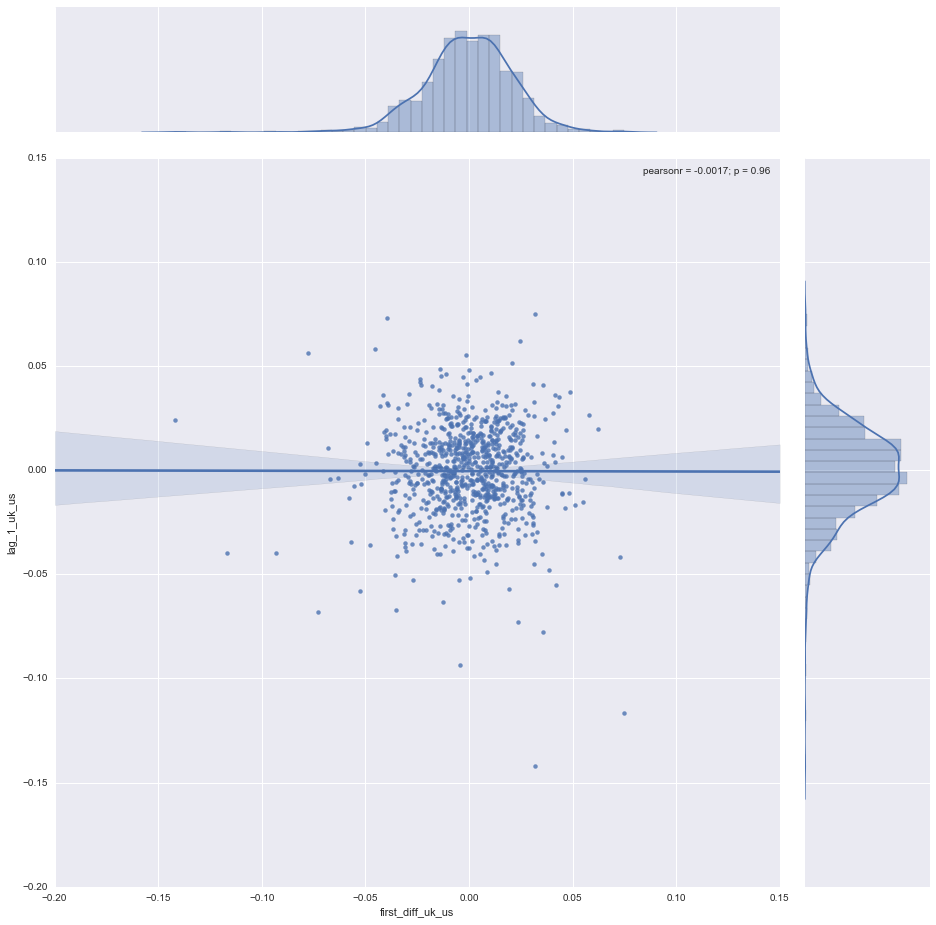

In [32]:
full['lag_1_uk_us'] = full['first_diff_uk_us'].shift()  
sb.jointplot('first_diff_uk_us', 'lag_1_uk_us', full, kind='reg', size=13) 


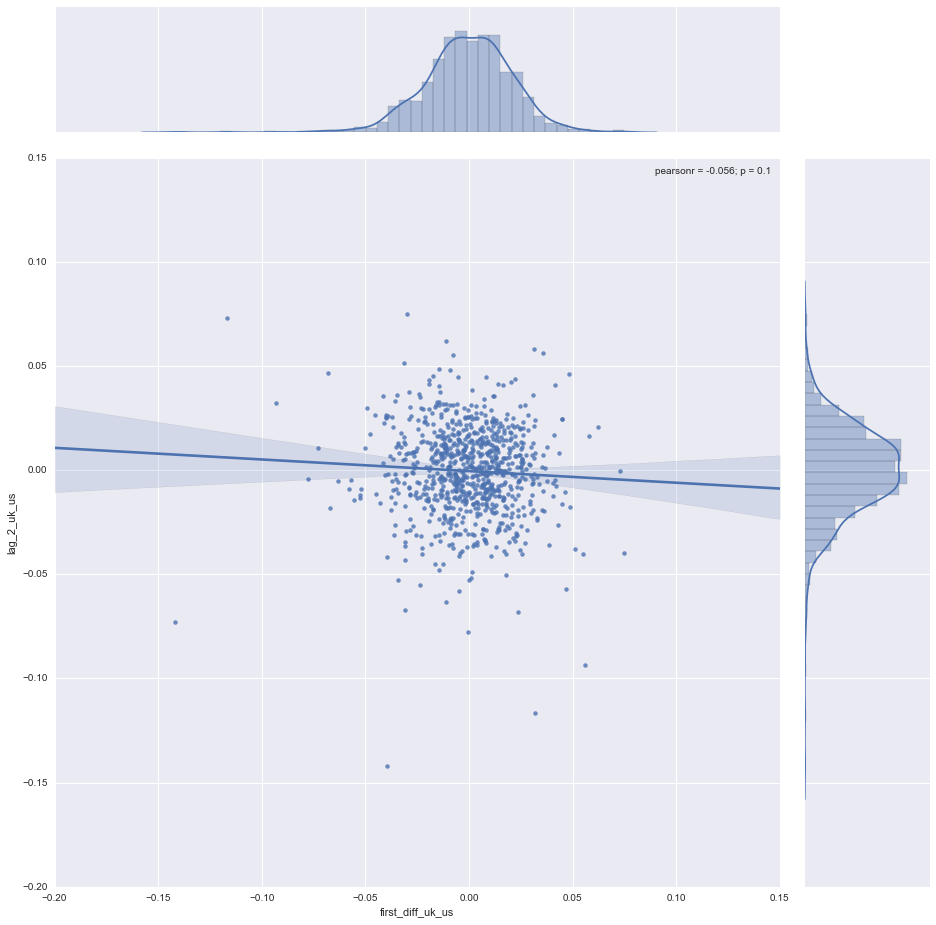

In [33]:
full['lag_2_uk_us'] = full['first_diff_uk_us'].shift(2)  
sb.jointplot('first_diff_uk_us', 'lag_2_uk_us', full, kind='reg', size=13) 



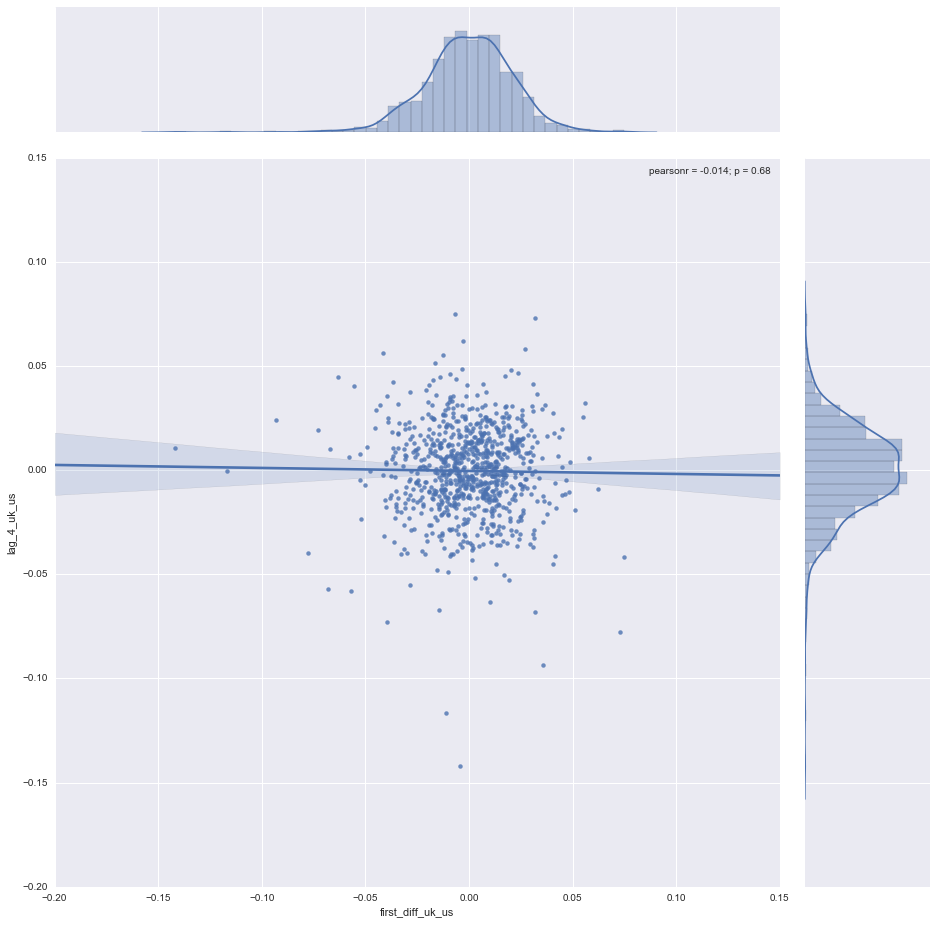

In [39]:
full['lag_4_uk_us'] = full['first_diff_uk_us'].shift(4)  
sb.jointplot('first_diff_uk_us', 'lag_4_uk_us', full, kind='reg', size=13) 



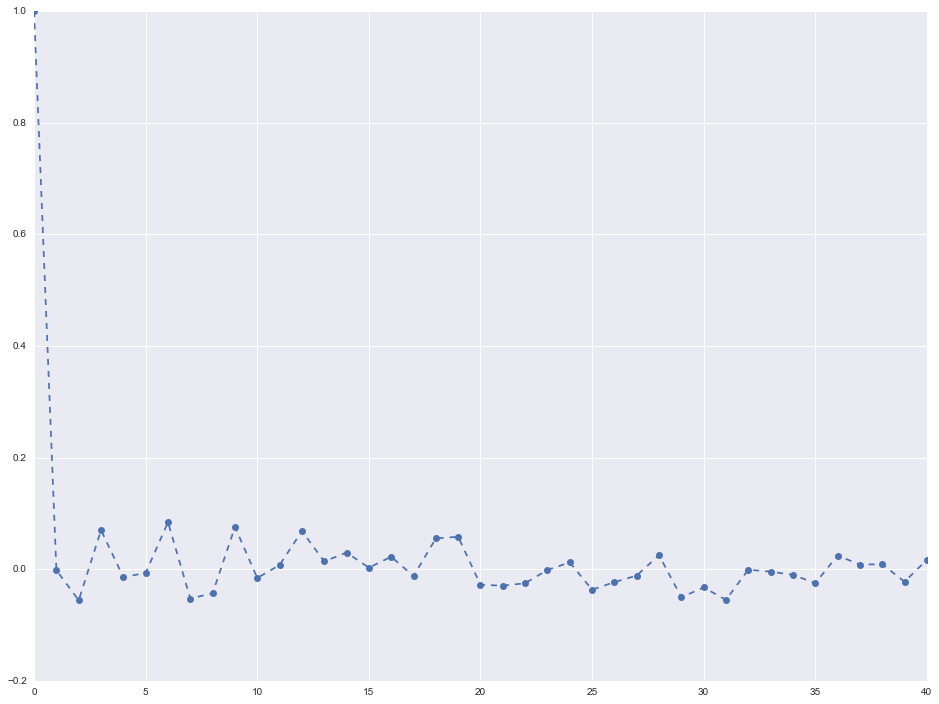

In [40]:
lag_correlations_UK_US = acf(full['first_diff_uk_us'].iloc[1:])  
fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_correlations_UK_US, marker='o', linestyle='--')  

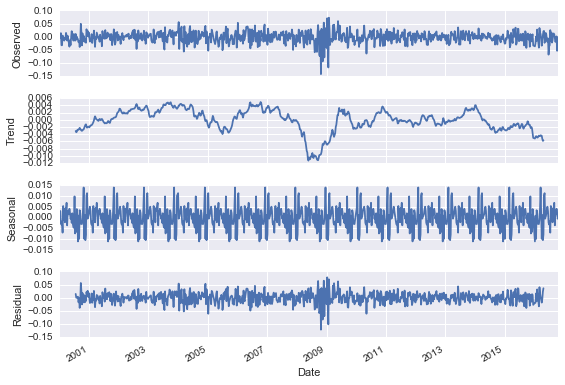

In [87]:
decomposition_UK_US = seasonal_decompose(full['first_diff_uk_us'][1:], model='additive', freq=52)  
fig = plt.figure()  
fig = decomposition_UK_US.plot() 
#plt.plot(decomposition_UK_US.trend)
#trend = pd.DataFrame(decomposition_UK_US.trend)


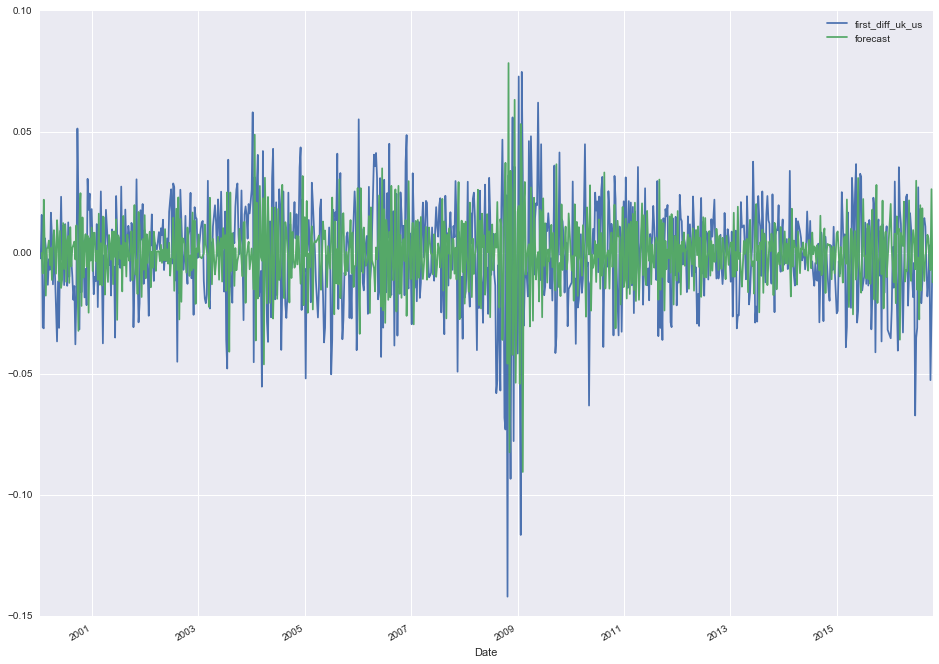

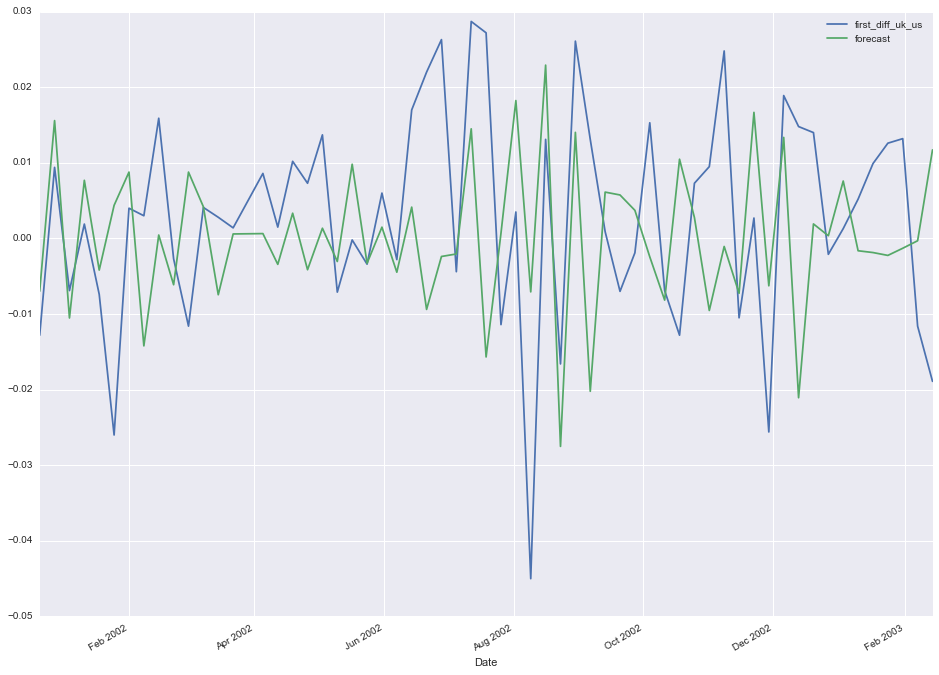

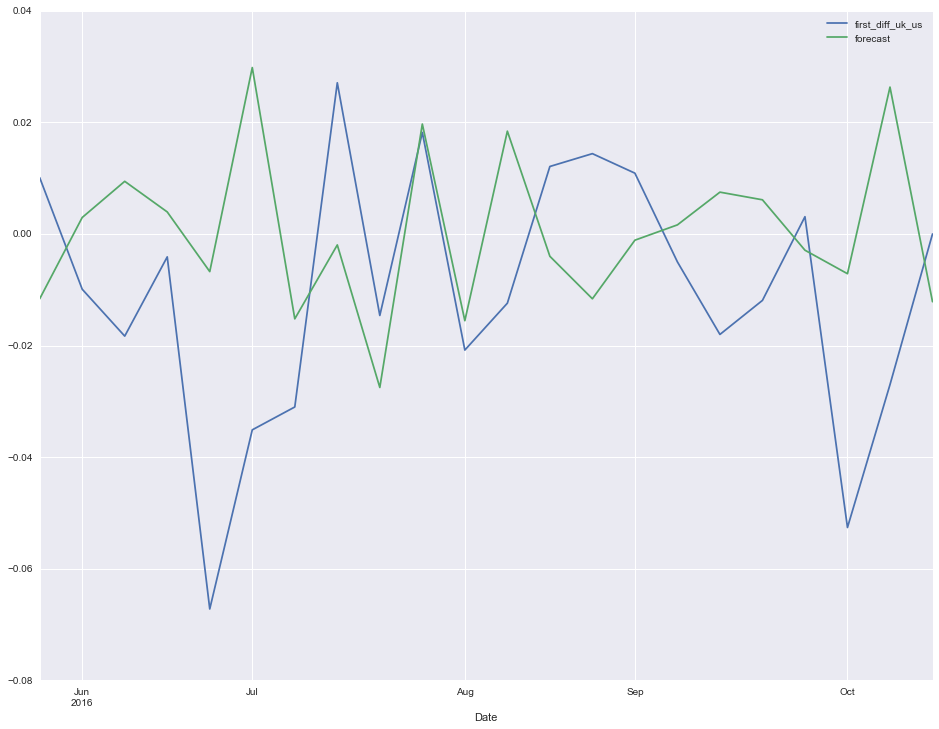

In [43]:
model_UK_US = sm.tsa.ARIMA(full['first_diff_uk_us'].iloc[1:], order=(1, 1, 0), dates=full['datetime'])  
results = model_UK_US.fit(disp=-1)  
full['forecast'] = results.fittedvalues  
full[['first_diff_uk_us', 'forecast']].plot(figsize=(16, 12))  
full[['first_diff_uk_us', 'forecast']].iloc[100:160, :].plot(figsize=(16, 12))  
full[['first_diff_uk_us', 'forecast']].iloc[830:860, :].plot(figsize=(16, 12))  

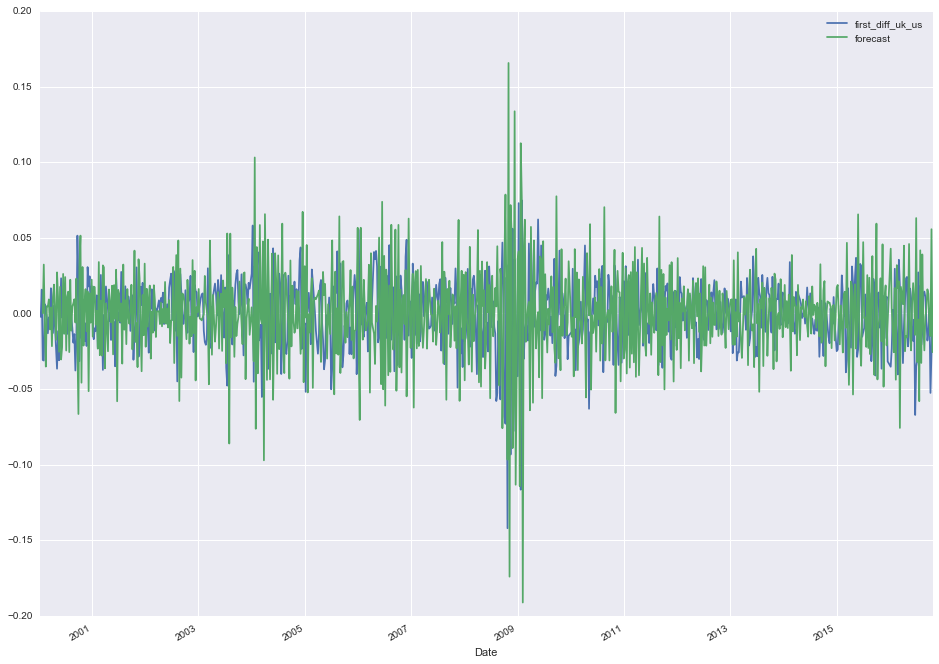

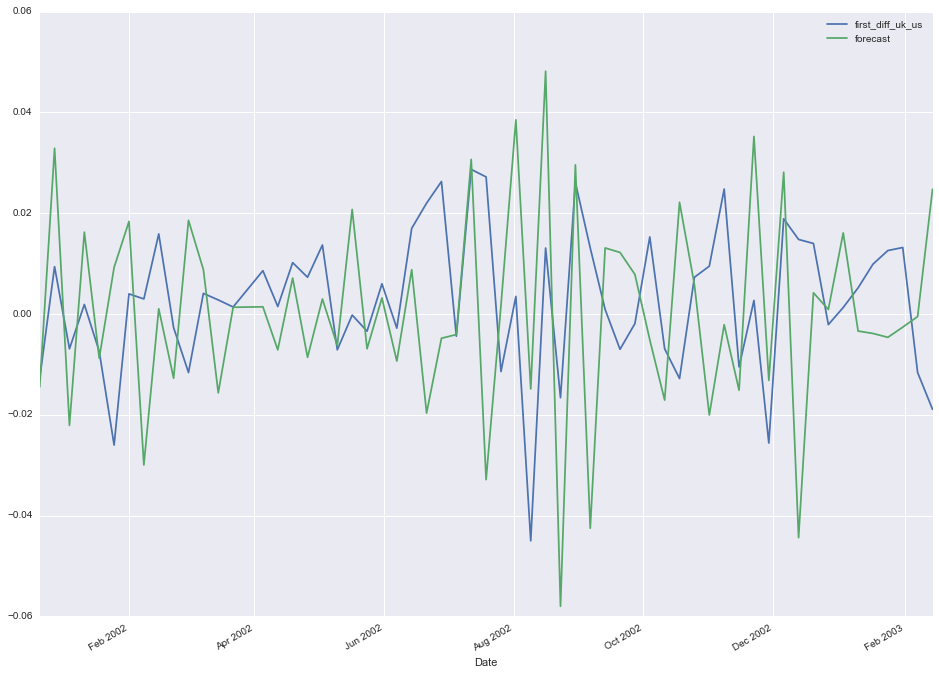

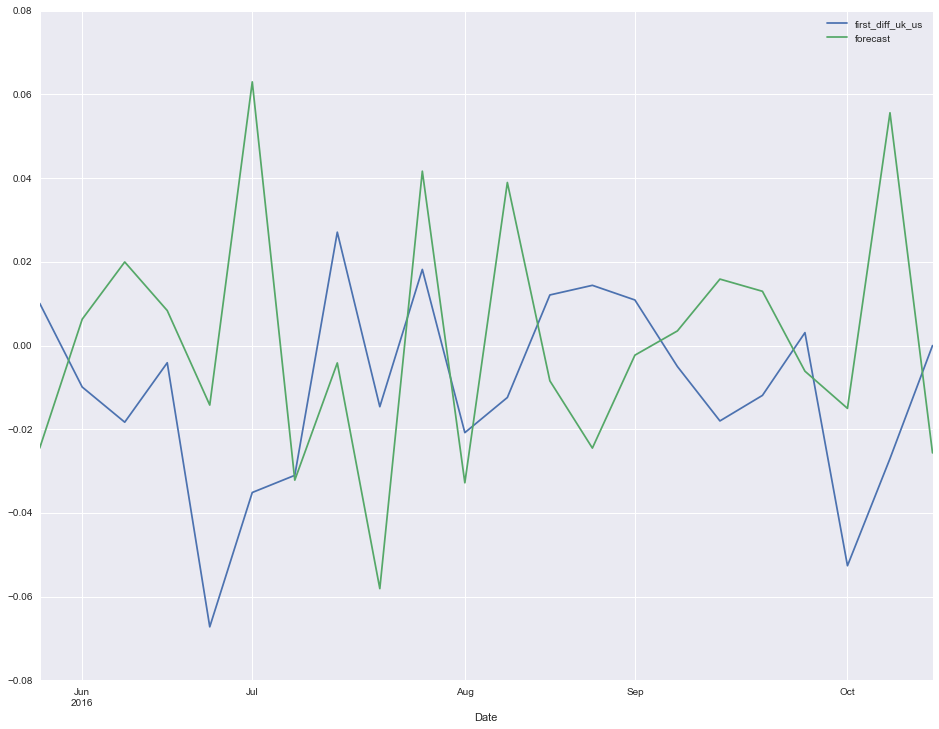

In [44]:
model_UK_US = sm.tsa.ARIMA(full['first_diff_uk_us'].iloc[1:], order=(0, 2, 1), dates=full['datetime'])  
results = model_UK_US.fit(disp=-1)  
full['forecast'] = results.fittedvalues  
full[['first_diff_uk_us', 'forecast']].plot(figsize=(16, 12))  
full[['first_diff_uk_us', 'forecast']].iloc[100:160, :].plot(figsize=(16, 12))  
full[['first_diff_uk_us', 'forecast']].iloc[830:860, :].plot(figsize=(16, 12)) 

In [155]:
print(results.params)

const                      -0.000014
ar.L1.D.First Difference   -0.473027
dtype: float64


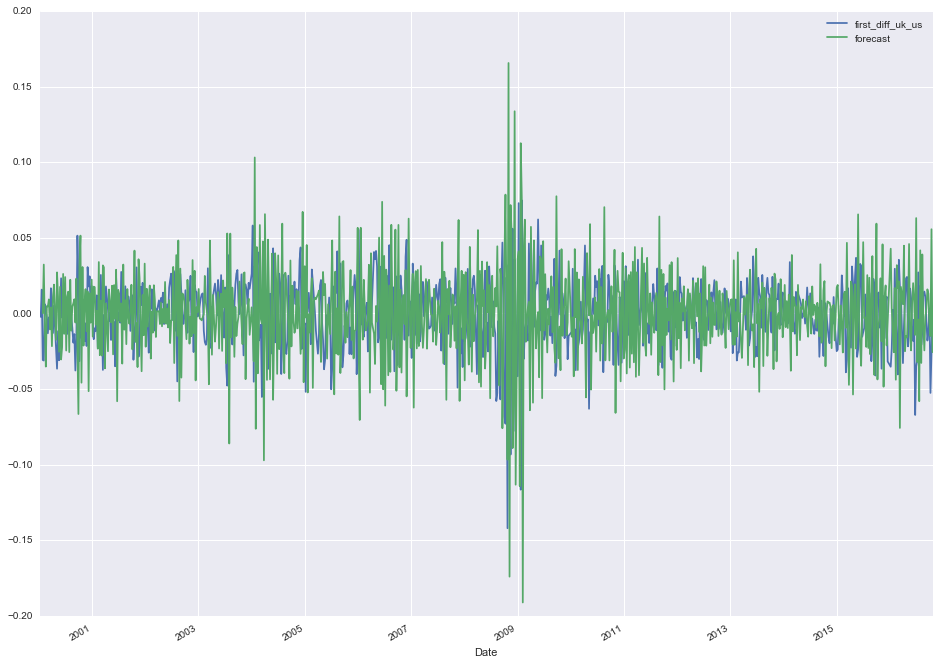

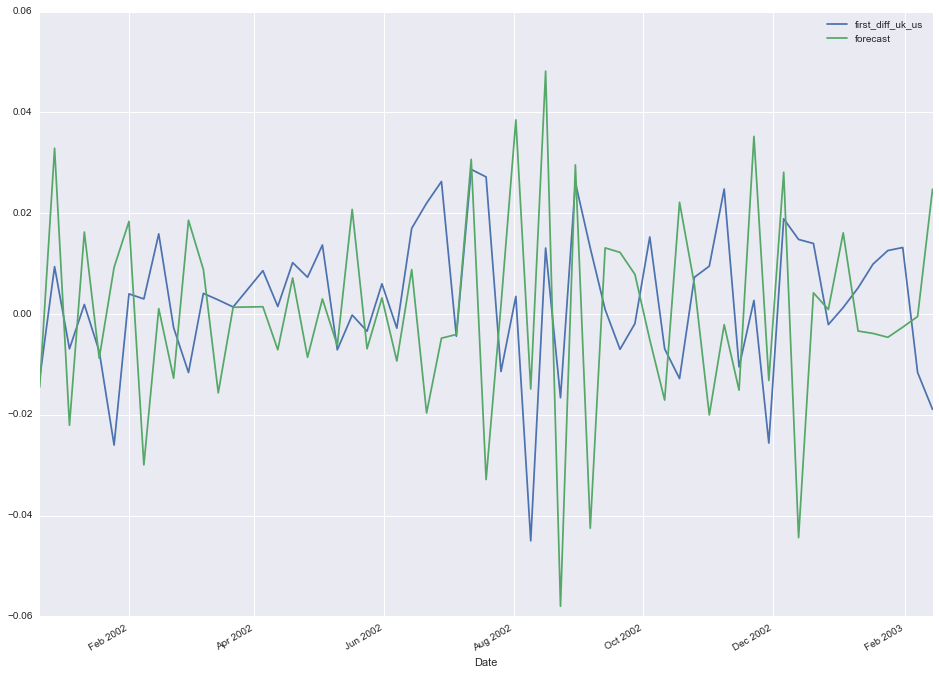

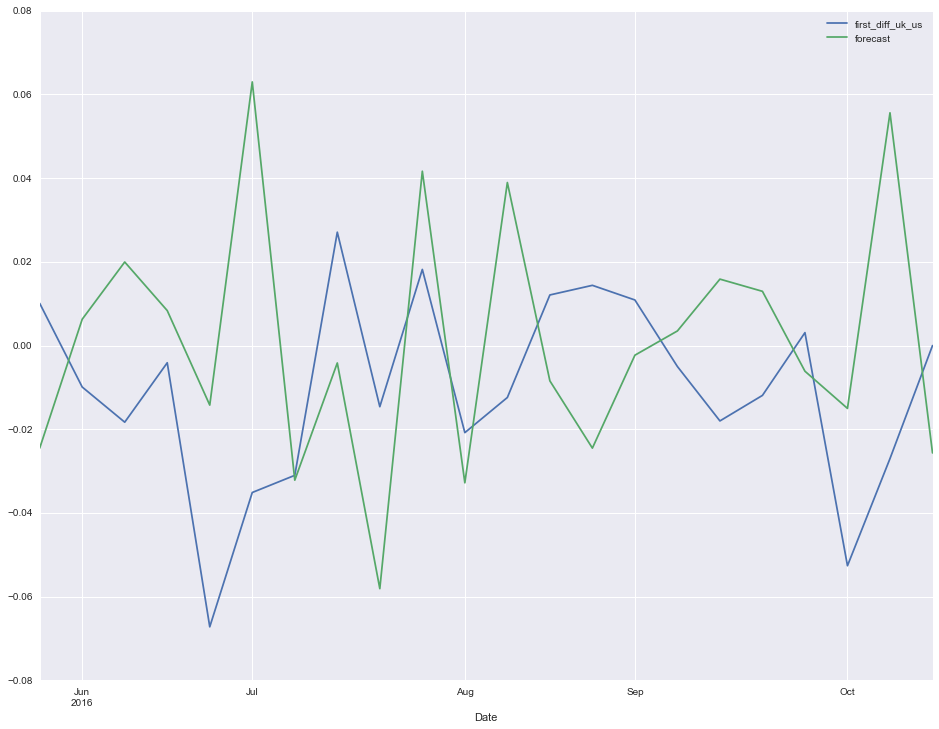

In [49]:
model_UK_US = sm.tsa.ARIMA(full['first_diff_uk_us'].iloc[1:], order=(0, 2, 1), 
                           dates=full['datetime'], exog=(full['first_diff_libor'].iloc[1:]))  
results = model_UK_US.fit(disp=-1)  
full['forecast'] = results.fittedvalues  
full[['first_diff_uk_us', 'forecast']].plot(figsize=(16, 12))  
full[['first_diff_uk_us', 'forecast']].iloc[100:160, :].plot(figsize=(16, 12))  
full[['first_diff_uk_us', 'forecast']].iloc[830:860, :].plot(figsize=(16, 12))

In [50]:
print(results.params)

const                       -1.004619e-07
first_diff_libor            -1.147551e-05
ma.L1.D2.first_diff_uk_us   -9.999463e-01
dtype: float64


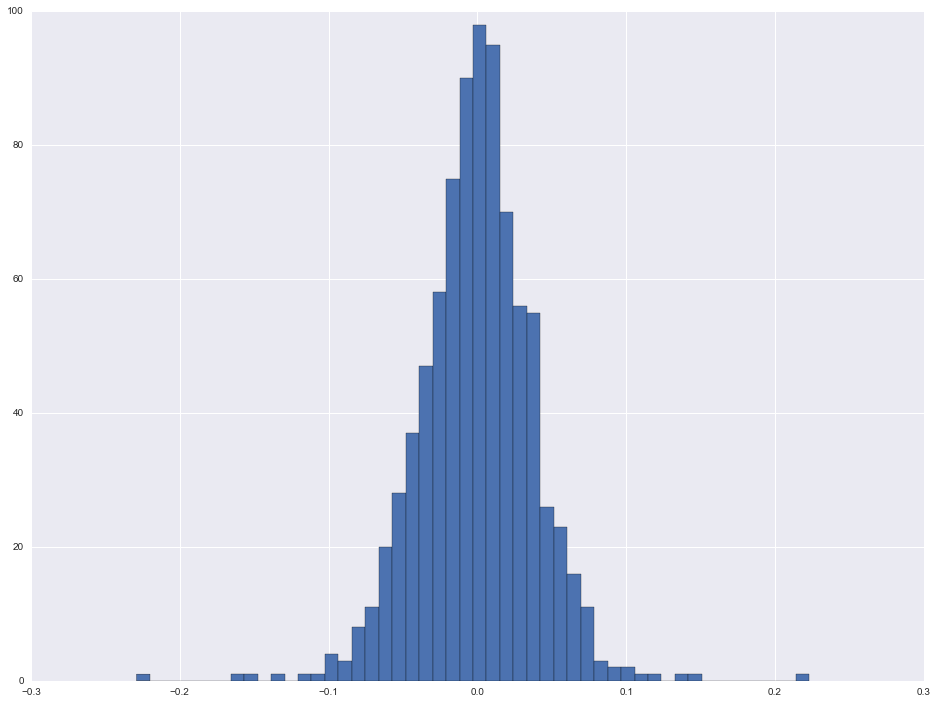

In [86]:
full['residuals_arma_0_2_1_libor']=full['first_diff_uk_us']-full['forecast']
#full['residuals_arma_0_2_1_libor'].plot(figsize=(16, 12))
full['residuals_arma_0_2_1_libor'].hist(figsize=(16, 12), bins=50)
#full['first_diff_uk_us'].plot(figsize=(16, 12))